In [1]:
#  encoding=utf-8

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


class DBScan (object):
    """
    the class inherits from object, encapsulate the  DBscan algorithm
    """
    def __init__(self, p):

        self.point = p
        self.db = DBSCAN(eps=0.2, min_samples=10).fit(self.point)

    def draw(self):

        coreSamplesMask = np.zeros_like(self.db.labels_, dtype=bool)
        coreSamplesMask[self.db.core_sample_indices_] = True
        labels = self.db.labels_
        nclusters = jiangzao(labels)

        # 绘制结果
        # 黑色被移除，并被标记为噪音。
        unique_labels = set(labels)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # 黑色用于噪声
                col = 'k'

            classMemberMask = (labels == k)

            # 画出分类点集
            xy = self.point[classMemberMask & coreSamplesMask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

            # 画出噪声点集
            xy = self.point[classMemberMask & ~coreSamplesMask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=3)
        # 加标题，显示分类数
        plt.title('Estimated number of clusters: %d' % nclusters)
        plt.show()


def jiangzao (labels):

    # 标签中的簇数，忽略噪声（如果存在）
    clusters = len(set(labels)) - (1 if -1 in labels else 0)
    return clusters

def standar_scaler(points):

    p = StandardScaler().fit_transform(points)
    return p

In [3]:
 centers = [[1, 1], [-1, -1], [-1, 1], [1, -1]]
 point,a = make_blobs(n_samples=2000, centers=centers, cluster_std=0.4,
                                random_state=0)
 point = standar_scaler(point)
print(point.shape)

(2000, 2)


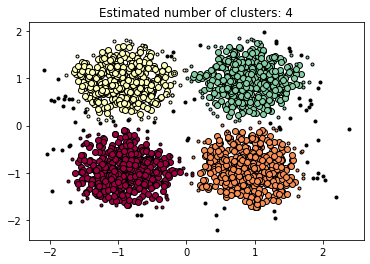

In [2]:
 db = DBScan(point)
 db.draw()